# Workshop 2: Building an ML Pipeline

In this notebook, we will learn how we can build machine learning (ML) pipelines for various takes. You will learn:

1. Basic Python programming concepts.
2. How to import datasets and preprocess different types of data.
3. Various data preprocessing techniques:
   - Imputation
   - Normalisation
   - Standardisation
   - Noise removal
   - Dimensionality Reduction
4. Building machine learning models:
   - Linear Regression (for regression tasks)
   - Logistic Regression (for classification tasks)
   - Decision Trees (very powerful and interpretable models)
   - Clustering (unsupervised learning)
   - A complete machine learning pipeline example
5. Basic natural language processing (NLP) tasks:
   - Word tokenisation
   - Simple embeddings
6. How to use prompt engineering and generative AI tools to assist in writing code.

Let's begin with some very basic Python concepts. If you are confident, then feel free to skip ahead to the next section.

### 1 Basic Python Concepts

Make sure you run every cell in this notebook. You can run a cell by clicking on it and pressing `Shift + Enter`, or by clicking the play button on the left side of the cell.

In [1]:
"""
In Python, some common keywords are:
- if, else, elif
- for, while (used for loops)
- def (used to define functions)
- class (used to define classes)
- import (used to import libraries)
- return (to return values from a function)

Below, we will print a message to show that everything is working well.
"""

# Printing "Hello, World!" - the classic starter in many programming lessons.
# To run this code in Google Colab, click on the play button next to the code.
print("Hello, World!")

# This is a comment, and it will not be executed.
# It is for the programmer to read and understand the code.

"""
This is a multi-line comment.
It can be used to write multiple lines of comments.
It is also not executed by the interpreter.
"""

Hello, World!


'\nThis is a multi-line comment.\nIt can be used to write multiple lines of comments.\nIt is also not executed by the interpreter.\n'

In [2]:
# In Python, variables do not need explicit type declarations.

# String
greeting = "Hello, students!"

# Integer
age = 20

# Float
temperature = 36.7

# Boolean
is_python_fun = True

# Let's print them out:
print(greeting, "I am", age, "years old.")
print("The temperature is", temperature, "degrees Celsius.")
print("Is Python fun?", is_python_fun)

Hello, students! I am 20 years old.
The temperature is 36.7 degrees Celsius.
Is Python fun? True


In [3]:
# Lists are collections of items. They are ordered and changeable.
my_list = [1, 2, 3, 4, 5]
print("This is a list:", my_list)

# Dictionaries store key-value pairs, and are unordered.
my_dict = {"name": "Alice", "age": 25}
print("This is a dictionary:", my_dict)

# We can index lists:
print("The first element in my_list is:", my_list[0])

# We can access dictionary items by key:
print("Alice's age is:", my_dict["age"])

This is a list: [1, 2, 3, 4, 5]
This is a dictionary: {'name': 'Alice', 'age': 25}
The first element in my_list is: 1
Alice's age is: 25


### 2 Datasets and Data Types

In [4]:
"""
We will import key Python libraries used in data analysis and machine learning:

- numpy: for numerical operations
- pandas: for data manipulation
- matplotlib.pyplot: for plotting graphs
- seaborn: for statistical data visualisation
- scikit-learn: for machine learning tasks
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots to show up nicely
%matplotlib inline
sns.set_style("whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Don't worry about this piece of code, it is to make sure that the dataset is installed correctly
# If you get an error in the following cell, run this cell, restart the kernel and then run the following cell again
import certifi
import os

os.environ["SSL_CERT_FILE"] = certifi.where()

In [6]:
"""
Let's load a sample dataset using pandas. 
We're using a built-in dataset from seaborn (tips dataset) for demonstration.
"""

# Load the 'tips' dataset from seaborn
tips_data = sns.load_dataset("tips")

# Display the first few rows of the dataset
print("First five rows:")
print(tips_data.head())

# Get basic information about the dataset
print("\nDataset Info:")
print(tips_data.info())

# Describe the numerical columns
print("\nStatistical summary:")
print(tips_data.describe())

"""
Floating point numbers are basically numbers with decimal points.
The category data type is used to represent data that has a fixed number of unique values.
"""

First five rows:
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None

Statistical summary:
       total_bill         tip        size
count  244.000000  244.000000 

'\nFloating point numbers are basically numbers with decimal points.\nThe category data type is used to represent data that has a fixed number of unique values.\n'

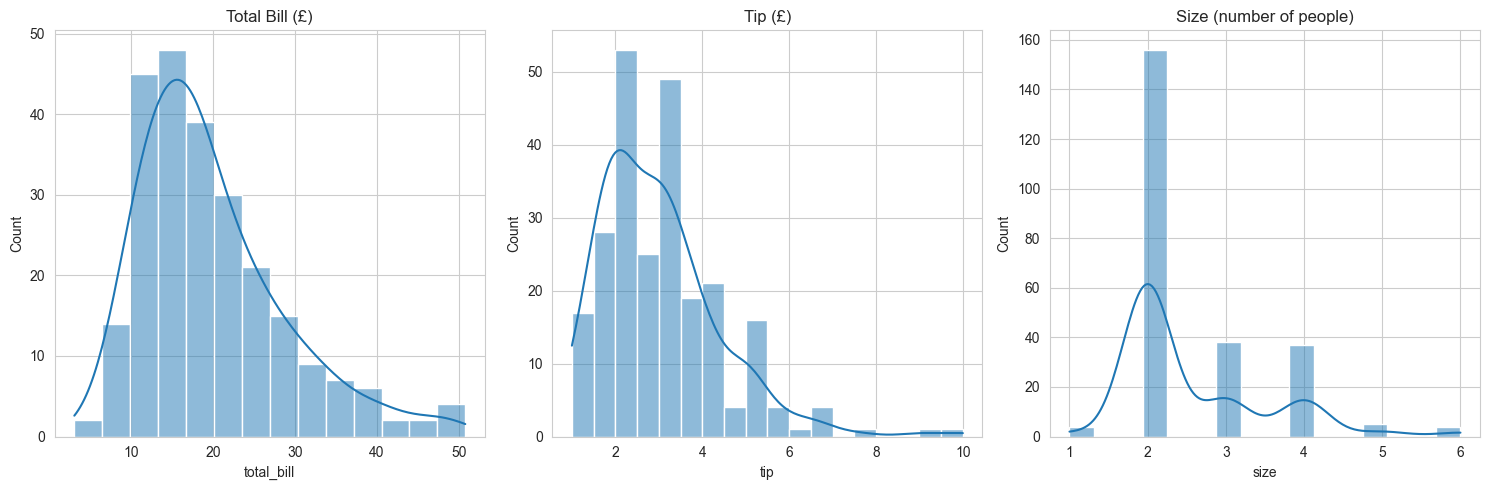

In [7]:
"""
Visualise selected features of the tips dataset.
"""

# Histogram for the total_bill, tip and size
plt.figure(figsize=(15, 5))

# kde is set to True to show the kernel density estimate
# It appears on our histogram as a smooth line
plt.subplot(1, 3, 1)
sns.histplot(tips_data["total_bill"], kde=True)
plt.title("Total Bill (£)")

plt.subplot(1, 3, 2)
sns.histplot(tips_data["tip"], kde=True)
plt.title("Tip (£)")

plt.subplot(1, 3, 3)
sns.histplot(tips_data["size"], kde=True)
plt.title("Size (number of people)")

plt.tight_layout()
plt.show()

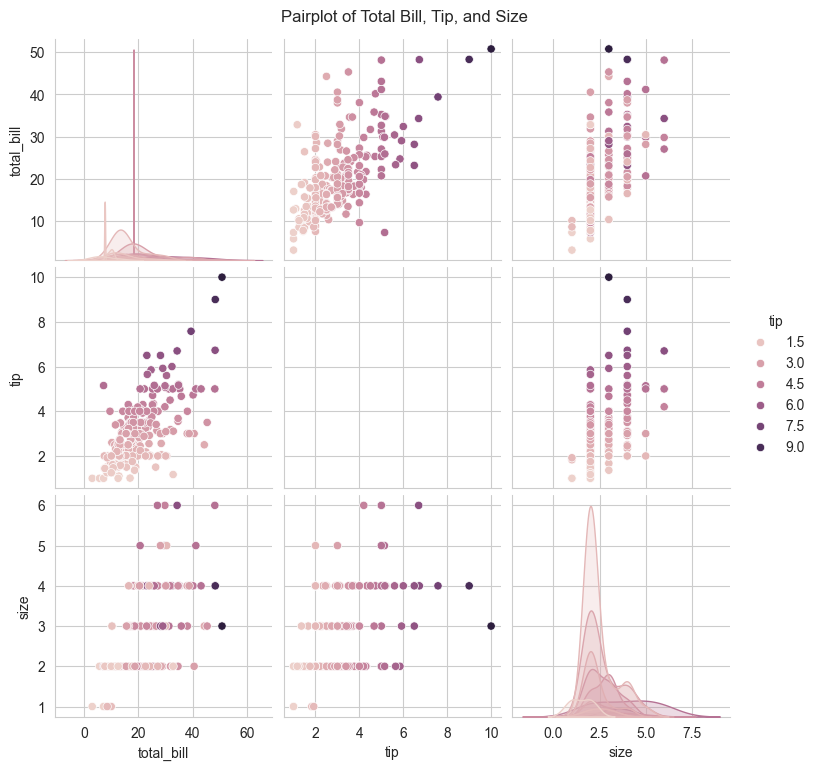

In [8]:
"""
The line graph looks like a bell curve, which is a common shape for histograms.

Now, what do you observe from the following visualisation?
"""

# Pairplot to inspect relationships between 'total_bill', 'tip', and 'size'
sns.pairplot(tips_data, vars=['total_bill', 'tip', 'size'], hue='tip', diag_kind='kde')
plt.suptitle("Pairplot of Total Bill, Tip, and Size", y=1.02)
plt.show()

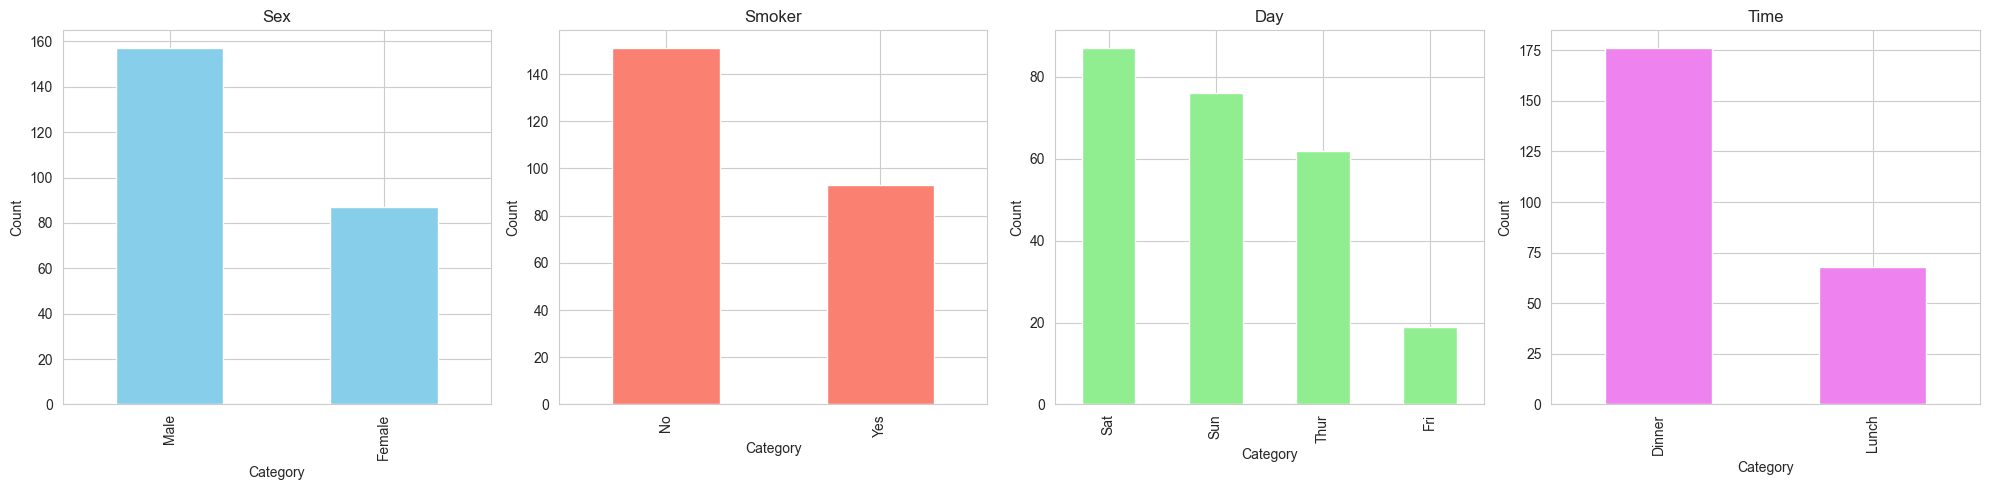

In [9]:
"""
Plot a bar chart for sex, smoker day and time.
"""

# Create subplots for 'sex', 'smoker', 'day', and 'time'
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Bar chart for 'sex'
tips_data["sex"].value_counts().plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Sex")
axes[0].set_xlabel("Category")
axes[0].set_ylabel("Count")

# Bar chart for 'smoker'
tips_data["smoker"].value_counts().plot(kind="bar", ax=axes[1], color="salmon")
axes[1].set_title("Smoker")
axes[1].set_xlabel("Category")
axes[1].set_ylabel("Count")

# Bar chart for 'day'
tips_data["day"].value_counts().plot(kind="bar", ax=axes[2], color="lightgreen")
axes[2].set_title("Day")
axes[2].set_xlabel("Category")
axes[2].set_ylabel("Count")

# Bar chart for 'time'
tips_data["time"].value_counts().plot(kind="bar", ax=axes[3], color="violet")
axes[3].set_title("Time")
axes[3].set_xlabel("Category")
axes[3].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [10]:
"""
Sometimes, we need to convert categorical data to numerical data.

Let's convert the sex, smoker, day and time columns to numerical data.
"""

# We can make males 1 and females -1 (Negative doesn't matter, but we want to see if there is a difference between males and females later)
tips_data["sex"] = tips_data["sex"].map({"Male": 1, "Female": -1})

# We can make smokers 1 and non-smokers -1
tips_data["smoker"] = tips_data["smoker"].map({"No": -1, "Yes": 1})

# We can make days 0, 1, 2, 3
tips_data["day"] = tips_data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})

# We can make lunch -1 and dinner 1
tips_data["time"] = tips_data["time"].map({"Lunch": -1, "Dinner": 1})

print(tips_data.head())

"""
As an afterthought, if we assume that a higher value means someone is more likely to tip, how could we change these conversions?
"""

   total_bill   tip sex smoker day time  size
0       16.99  1.01  -1     -1   3    1     2
1       10.34  1.66   1     -1   3    1     3
2       21.01  3.50   1     -1   3    1     3
3       23.68  3.31   1     -1   3    1     2
4       24.59  3.61  -1     -1   3    1     4


'\nAs an afterthought, if we assume that a higher value means someone is more likely to tip, how could we change these conversions?\n'

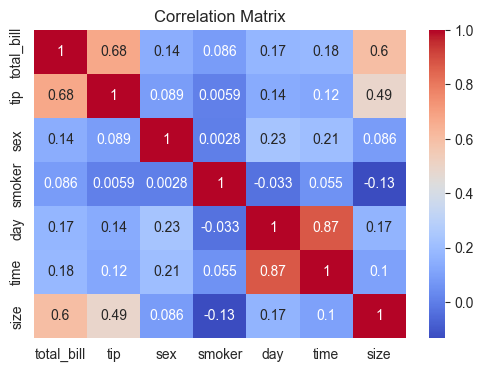

In [11]:
"""
Let's investigate the correlation between numerical features.

This will help us understand how features are related to each other.
"""

# Compute the correlation matrix
corr = tips_data.corr()

# Generate a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Disable warnings (you may see a warning in the next cell
# Running this cell should hide it
import warnings

warnings.filterwarnings("ignore")

### 3 Data Preprocessing

In [13]:
"""
Let's see if our dataset has missing values and how to handle them.
For demonstration, we'll artificially introduce some missing values.
"""

# Introduce missing values in the 'total_bill' column arbitrarily
import random

random_indices = random.sample(range(len(tips_data)), 5)  # select 5 random rows
for idx in random_indices:
    tips_data.at[idx, "total_bill"] = None  # set total_bill to NaN

# Check for missing values
print("Number of missing values per column:")
print(tips_data.isnull().sum())

# Let's replace missing values in 'total_bill' with the column's mean (Imputation)
mean_total_bill = tips_data["total_bill"].mean()
tips_data["total_bill"].fillna(mean_total_bill, inplace=True)


print("\nNumber of missing values after imputation:")
print(tips_data.isnull().sum())

Number of missing values per column:
total_bill    5
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Number of missing values after imputation:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


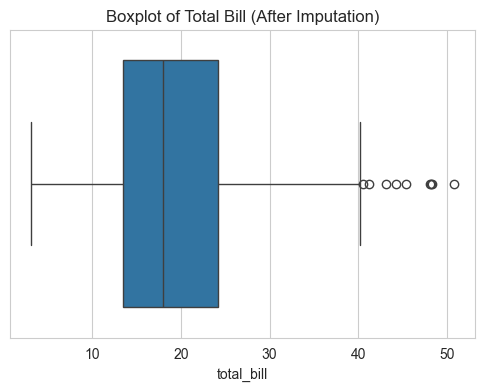

"\nIf we spot unusual outliers, we might remove them, but in this dataset, we can keep it simple.\nIf needed, we could filter out rows with 'total_bill' above a certain threshold.\n"

In [14]:
"""
'Noise' can mean various things (e.g., outliers, irrelevant data).
For a quick demonstration, we can detect outliers visually.
We'll create a simple boxplot for 'total_bill'.
"""

plt.figure(figsize=(6, 4))
sns.boxplot(x=tips_data["total_bill"])
plt.title("Boxplot of Total Bill (After Imputation)")
plt.show()

"""
If we spot unusual outliers, we might remove them, but in this dataset, we can keep it simple.
If needed, we could filter out rows with 'total_bill' above a certain threshold.
"""

In [15]:
"""
Normalisation typically rescales the range of features to [0, 1].
Standardisation transforms data so that it has mean 0 and standard deviation 1.
We'll demonstrate with the 'total_bill' column. We'll create new columns for demonstration:
"""

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Convert total_bill to a 2D numpy array for the scaler (scikit-learn requirement)
total_bill_values = tips_data[['total_bill']].values

# Normalisation
min_max_scaler = MinMaxScaler()
tips_data['total_bill_normalised'] = min_max_scaler.fit_transform(total_bill_values)

# Standardisation
std_scaler = StandardScaler()
tips_data['total_bill_standardised'] = std_scaler.fit_transform(total_bill_values)

print(tips_data[['total_bill','total_bill_normalised','total_bill_standardised']].head(10))

   total_bill  total_bill_normalised  total_bill_standardised
0       16.99               0.291579                -0.331267
1       10.34               0.152283                -1.084691
2       21.01               0.375786                 0.124186
3       23.68               0.431713                 0.426688
4       24.59               0.450775                 0.529788
5       25.29               0.465438                 0.609096
6        8.77               0.119397                -1.262566
7       26.88               0.498743                 0.789237
8       15.04               0.250733                -0.552196
9       14.78               0.245287                -0.581653


In [16]:
"""
We will demonstrate Principal Component Analysis (PCA) on a slightly larger numerical dataset.
For simplicity, let's just extract numeric columns from 'tips' and do a small PCA.

PCA is a technique used to reduce high-dimensional data into fewer features while retaining most of the variation.
"""

from sklearn.decomposition import PCA

# Extract numeric columns (ignoring nulls for demonstration):
numeric_data = tips_data.select_dtypes(include=[np.number]).dropna(axis=1)

# We will do a 2-component PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data)

# pca_result is now reduced to 2 dimensions
print("Original numeric shape:", numeric_data.shape)
print("Reduced shape:", pca_result.shape)

# Show the captured variance in the two components
# Ideally, we want to capture most of the variance with fewer components
# The explained variance ratio tells us how much variance is captured by each component
# The total explained variance is the sum of the explained variance ratios
print("Explained variance ratio:", pca.explained_variance_ratio_.round(2))
print("Total explained variance:", sum(pca.explained_variance_ratio_).round(2))

Original numeric shape: (244, 5)
Reduced shape: (244, 2)
Explained variance ratio: [0.98 0.01]
Total explained variance: 0.99


#### 4 Building Machine Learning Models

Mean Squared Error: 29.007212835622173
Coefficients: [3.02465708 3.01499509]
Intercept: 3.1853724000472994


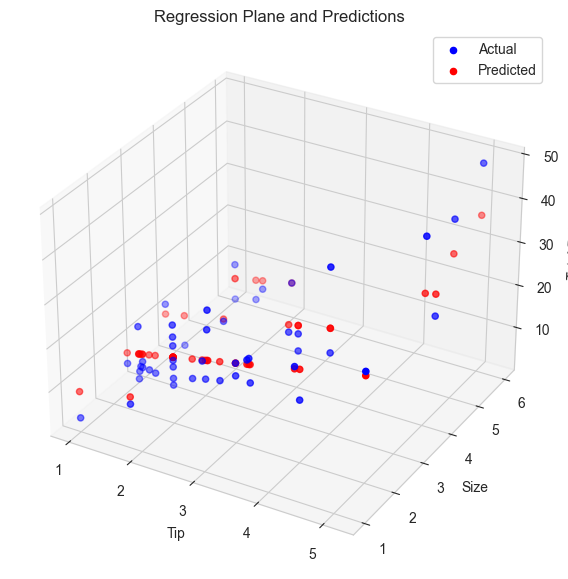

'\nWhat if we used all the features?\n\nDo you think that this model is good, and if not, then why?\n'

In [17]:
"""
Linear regression is used to predict a continuous target.
We will predict 'total_bill' using 'size' and 'tip'.

Steps:
1. Prepare features (X) and target (y).
2. Split dataset into training and testing sets.
3. Train a linear regression model.
4. Evaluate performance.
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Let's keep it very simple: We predict 'total_bill' based on 'tip' and 'size'
X = tips_data[["tip", "size"]]  # features
y = tips_data["total_bill"]  # target

# Split into train (80%) and test (20%)
# Random state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create the linear regression model
lin_reg = LinearRegression()

# Train (fit) the model on training data
lin_reg.fit(X_train, y_train)

# Predict on test data
y_pred = lin_reg.predict(X_test)

# Evaluate using Mean Squared Error (MSE)
# This is the average of the squared differences between predicted and actual values
# Lower values are better, with 0 being perfect
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display coefficients and intercept
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Plot the regression line and all points in 3D (to show both features and target)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the actual points
ax.scatter(X_test["tip"], X_test["size"], y_test, color='blue', label='Actual')

# Plot the predicted points
ax.scatter(X_test["tip"], X_test["size"], y_pred, color='red', label='Predicted')

ax.set_xlabel('Tip')
ax.set_ylabel('Size')
ax.set_zlabel('Total Bill')
plt.title("Regression Plane and Predictions")
plt.legend()
plt.show()

"""
What if we used all the features?

Do you think that this model is good, and if not, then why?
"""

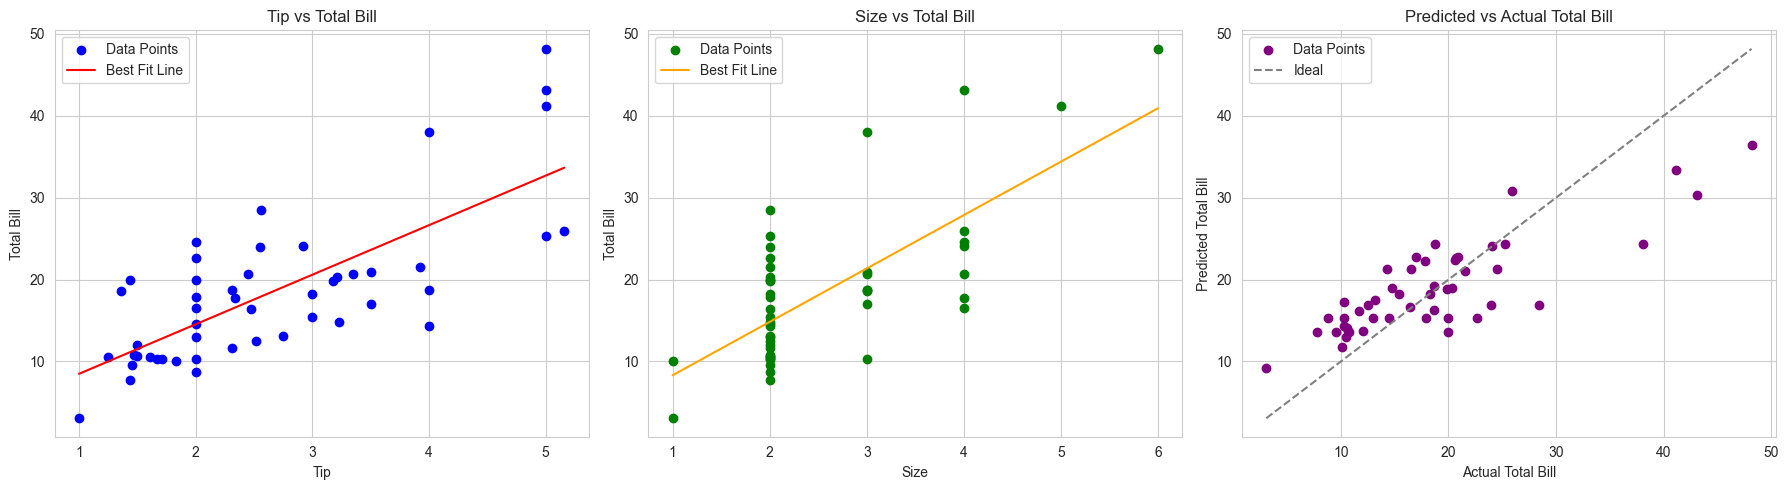

"\nDiscussion:\nUsing only 'tip' and 'size' to predict 'total_bill' gives a simple linear model,\nbut if you used all features (e.g., including categorical variables after proper encoding)\nthe model might change. In our case, the 3D plot and the 2D plots show that there is a clear\nlinear relation with 'tip' and a looser relation with 'size'. However, the prediction accuracy \nmay still be limited because 'total_bill' is affected by many factors (like time, day, and group composition).\nTherefore, the model might be overly simplistic when using only these two predictors.\n"

In [18]:
""""
Now, add 2 more plots as 3 subplots in one row.
We will create:
   - Plot 1: 'tip' (predictor) vs. 'total_bill' (target) scatter with best-fit line.
   - Plot 2: 'size' (predictor) vs. 'total_bill' scatter with best-fit line.
   - Plot 3: Actual total_bill vs. model-predicted total_bill with an identity line.
"""

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ----- Plot 1: Tip vs Total Bill -----
x_tip = X_test["tip"]
y_actual = y_test

axes[0].scatter(x_tip, y_actual, color="blue", label="Data Points")
# Compute best-fit line for tip -> total_bill
coeffs_tip = np.polyfit(x_tip, y_actual, deg=1)
poly_tip = np.poly1d(coeffs_tip)
x_line = np.linspace(x_tip.min(), x_tip.max(), 100)
axes[0].plot(x_line, poly_tip(x_line), color="red", label="Best Fit Line")
axes[0].set_xlabel("Tip")
axes[0].set_ylabel("Total Bill")
axes[0].set_title("Tip vs Total Bill")
axes[0].legend()

# ----- Plot 2: Size vs Total Bill -----
x_size = X_test["size"]
# Using the same y_actual from y_test
axes[1].scatter(x_size, y_actual, color="green", label="Data Points")
# Compute best-fit line for size -> total_bill
coeffs_size = np.polyfit(x_size, y_actual, deg=1)
poly_size = np.poly1d(coeffs_size)
x_line_size = np.linspace(x_size.min(), x_size.max(), 100)
axes[1].plot(x_line_size, poly_size(x_line_size), color="orange", label="Best Fit Line")
axes[1].set_xlabel("Size")
axes[1].set_ylabel("Total Bill")
axes[1].set_title("Size vs Total Bill")
axes[1].legend()

# ----- Plot 3: Predicted Total Bill vs Actual Total Bill -----
# Here, x-axis is actual total_bill and y-axis is predicted. An ideal model will have points lie near the identity line.
axes[2].scatter(y_actual, y_pred, color="purple", label="Data Points")
# For a reference, plot the identity line (y = x)
min_val = min(y_actual.min(), y_pred.min())
max_val = max(y_actual.max(), y_pred.max())
axes[2].plot(
    [min_val, max_val], [min_val, max_val], color="gray", linestyle="--", label="Ideal"
)
axes[2].set_xlabel("Actual Total Bill")
axes[2].set_ylabel("Predicted Total Bill")
axes[2].set_title("Predicted vs Actual Total Bill")
axes[2].legend()

plt.tight_layout()
plt.show()


"""
Discussion:
Using only 'tip' and 'size' to predict 'total_bill' gives a simple linear model,
but if you used all features (e.g., including categorical variables after proper encoding)
the model might change. In our case, the 3D plot and the 2D plots show that there is a clear
linear relation with 'tip' and a looser relation with 'size'. However, the prediction accuracy 
may still be limited because 'total_bill' is affected by many factors (like time, day, and group composition).
Therefore, the model might be overly simplistic when using only these two predictors.
"""

In [19]:
"""
Logistic regression is used to predict a categorical variable (e.g., 'Yes' or 'No').
We will use 'tips' dataset to classify whether the tip was 'high' or 'low'.

Steps:
1. Create a 'high_tip' label that is 1 if tip > certain threshold, 0 otherwise.
2. Split into features (X) and target (y).
3. Train a logistic regression model.
4. Evaluate performance with accuracy.
"""

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Let's create a binary classification: 'high_tip' > $3 => 1, else 0
tips_data["high_tip"] = tips_data["tip"].apply(lambda x: 1 if x > 3 else 0)

# Features: 'total_bill' and 'size'
X = tips_data[["total_bill", "size"]]
y = tips_data["high_tip"]

# Split data
# X_train: features for training, X_test: features for testing
# y_train: target for training, y_test: target for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Classification accuracy:", accuracy)

Classification accuracy: 0.7346938775510204


   total_bill   tip  cluster
0       16.99  1.01        1
1       10.34  1.66        1
2       21.01  3.50        1
3       23.68  3.31        0
4       24.59  3.61        0
5       25.29  4.71        0
6        8.77  2.00        1
7       26.88  3.12        0
8       15.04  1.96        1
9       14.78  3.23        1


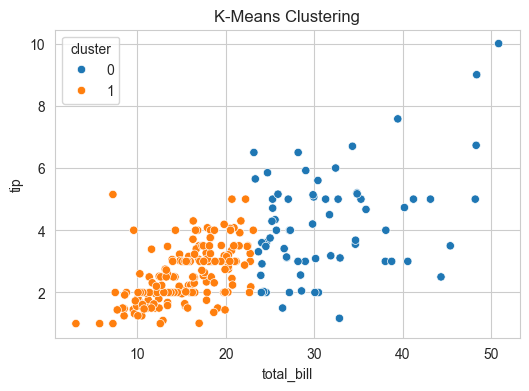

In [20]:
"""
Clustering is an unsupervised learning technique.
We'll use K-Means to group similar samples together. 
Let's cluster the numeric data from tips (just 'total_bill' and 'tip') into 2 clusters.
"""

from sklearn.cluster import KMeans

# Extract just two numeric columns
clustering_data = tips_data[["total_bill", "tip"]].dropna()

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(clustering_data)

# Cluster labels
labels = kmeans.labels_

# Add labels back to the dataset
clustering_data["cluster"] = labels

print(clustering_data.head(10))

# Plot the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(data=clustering_data, x="total_bill", y="tip", hue="cluster")
plt.title("K-Means Clustering")
plt.show()

In [21]:
"""
Logistic Regression with Clustered Data.

The idea is that now we have a new feature 'cluster' (0 or 1) that we can use to predict 'high_tip'.
Since there is less overlap between the clusters, the model might perform better.
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Import necessary functions

# Use the 'clustering_data' DataFrame that contains the columns 'total_bill', 'tip', and 'cluster'
# Here, we use 'total_bill' and 'tip' as predictors, and 'cluster' (0 or 1) as the target.
X_cluster = clustering_data[['total_bill', 'tip']]
y_cluster = clustering_data['cluster']

# Split the data into training and testing sets (80% train, 20% test)
X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster = train_test_split(
    X_cluster, y_cluster, test_size=0.2, random_state=42
)

# Create and train logistic regression on the clustered data
log_reg_cluster = LogisticRegression()
log_reg_cluster.fit(X_train_cluster, y_train_cluster)

# Make predictions on the test set
y_pred_cluster = log_reg_cluster.predict(X_test_cluster)

# Evaluate the performance
accuracy_cluster = accuracy_score(y_test_cluster, y_pred_cluster)
print("Logistic Regression Accuracy on Clustered Data:", accuracy_cluster)

# Optionally, display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_cluster, y_pred_cluster))

"""
This cell splits the clustered data into training and testing sets, trains a logistic regression model to predict the cluster (0 or 1) from total_bill and tip, and then evaluates the model by calculating accuracy and displaying the confusion matrix.

Extension: What is the receiver operating characteristic (ROC) curve, and how can it be used to evaluate a binary classifier?
"""

Logistic Regression Accuracy on Clustered Data: 1.0
Confusion Matrix:
[[10  0]
 [ 0 39]]


'\nThis cell splits the clustered data into training and testing sets, trains a logistic regression model to predict the cluster (0 or 1) from total_bill and tip, and then evaluates the model by calculating accuracy and displaying the confusion matrix.\n\nExtension: What is the receiver operating characteristic (ROC) curve, and how can it be used to evaluate a binary classifier?\n'

Confusion Matrix (raw counts):
[[10  0]
 [ 0 39]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        39

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49



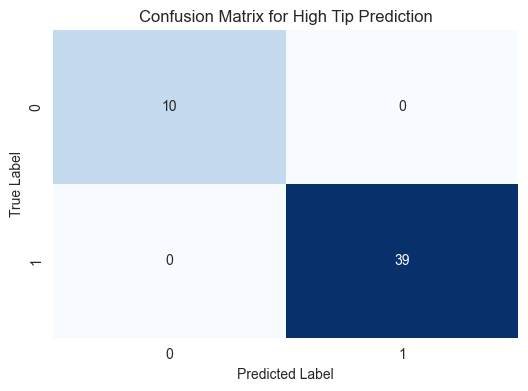

'\nDiscussion:\nThe confusion matrix above provides a complete breakdown of our model’s performance.\nFor binary classification:\n    - Top-left element (cm[0,0]) corresponds to True Negatives (TN).\n    - Top-right element (cm[0,1]) corresponds to False Positives (FP).\n    - Bottom-left element (cm[1,0]) corresponds to False Negatives (FN).\n    - Bottom-right element (cm[1,1]) corresponds to True Positives (TP).\n\nBy understanding these values, one can determine how frequently the model misclassified instances in each category. \nThis information is crucial for further model improvement, balancing precision and recall, and understanding the cost of misclassifications (e.g., predicting a low tip when it was actually high or vice versa).\n\nCan you do the same for the original results, without clustering and see the difference in performance?\n'

In [32]:
"""
Let's learn about confusion matrics and metrics.
"""

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# (For example, we use the logistic regression model on high_tip classification)
# Assuming y_test and y_pred are available from the earlier cell that trained the model.
# If you need to compute predictions again, make sure to call the predict() on your model.
# For this demonstration, we assume they have been computed.
#
# Explanation:
# A confusion matrix is a table that is used to evaluate the performance of a classification model.
# The rows in the matrix represent the true labels (ground truth), while the columns represent the predicted labels.
# For a binary classification problem, the confusion matrix has the following form:
#
#              Predicted Negative    Predicted Positive
# True Negative         TN                    FP
# True Positive         FN                    TP
#
# Where:
#   - TN (True Negatives): Number of correctly predicted negative class.
#   - TP (True Positives): Number of correctly predicted positive class.
#   - FP (False Positives): Number of negatives incorrectly predicted as positive.
#   - FN (False Negatives): Number of positives incorrectly predicted as negative.
#
# This breakdown helps you understand not only the overall accuracy of the model,
# but also the type of errors it is making. For instance, a high number of false negatives
# might indicate that your model is missing important positive cases, which may be more
# detrimental in certain applications.
#
# In addition to the raw counts, we can also generate a classification report which
# includes precision, recall, f1-score, and support for each class.

# Compute the confusion matrix for the logistic regression classifier:
cm = confusion_matrix(y_test_cluster, y_pred_cluster)

# Print the confusion matrix as a numpy array (for quick inspection)
print("Confusion Matrix (raw counts):")
print(cm)

# Optionally, you can also print out a classification report:
print("\nClassification Report:")
print(classification_report(y_test_cluster, y_pred_cluster))

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels and title to the plot for clarity
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for High Tip Prediction")
plt.show()

"""
Discussion:
The confusion matrix above provides a complete breakdown of our model’s performance.
For binary classification:
    - Top-left element (cm[0,0]) corresponds to True Negatives (TN).
    - Top-right element (cm[0,1]) corresponds to False Positives (FP).
    - Bottom-left element (cm[1,0]) corresponds to False Negatives (FN).
    - Bottom-right element (cm[1,1]) corresponds to True Positives (TP).

By understanding these values, one can determine how frequently the model misclassified instances in each category. 
This information is crucial for further model improvement, balancing precision and recall, and understanding the cost of misclassifications (e.g., predicting a low tip when it was actually high or vice versa).

Can you do the same for the original results, without clustering and see the difference in performance?
"""

#### Machine Learning Pipeline Example

Now, let's **combine** these steps into a **pipeline**. A pipeline is a sequence of steps:
1. Data Loading
2. Data Cleaning (imputation, noise removal)
3. Feature Engineering (normalisation, encoding)
4. Model Selection/Training
5. Evaluation

We'll show an example with **Logistic Regression** as the final model, following a simplified pipeline. 

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

"""
Steps in the pipeline:
1. Impute missing numeric values with mean.
2. Scale numeric features.
3. Train logistic regression.
"""

# For demonstration, let's create a pipeline for the classification of 'high_tip'.

# Our features will again be 'total_bill' and 'size'.
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

# We define a transformer for numeric features:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Now we combine the transformer into a ColumnTransformer:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Finally, we build the pipeline with a logistic regression step:
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Prepare data
X = tips_data[numeric_features + categorical_features]  # from earlier
y = tips_data['high_tip']  # from earlier

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Fit the pipeline
clf_pipeline.fit(X_train, y_train)

# Evaluate
print("Training accuracy:", clf_pipeline.score(X_train, y_train))
print("Test accuracy:", clf_pipeline.score(X_test, y_test))

Training accuracy: 0.7333333333333333
Test accuracy: 0.7551020408163265


### 5 Prompt Engineering and Generative AI

#### Using Generative AI to Fill in Code

Sometimes, you might not remember the exact syntax or the best approach. 
You can use generative AI tools (like ChatGPT or others) to help. 
Here is an example prompt you could use:

**Prompt**:  
"I have a dataset where I want to build a pipeline using `DecisionTreeClassifier`.  
1. It should include imputation of missing values.  
2. Normalisation of numerical columns.  
3. One-hot encoding of categorical columns.  
4. Then train a decision tree.  
5. Show me how to split data and get accuracy.  
Please provide a Python code example."

By providing such **detailed instructions** (prompt engineering), you can get the AI model to generate a code skeleton which you can tweak and customise.

---

#### Exercise for Students

1. **Build a new pipeline** for classification using a **Random Forest Classifer** instead of **Logistic Regression**. You may want to look up what is a random forest.  
2. Include the following steps in your pipeline:
   - Impute missing numeric values.
   - Scale numeric features.
   - Encode categorical variables (e.g., 'sex' from tips dataset).
   - Train a Decision Tree Classifier.

**Remember**: Good prompt engineering involves specifying each step you need so that the AI can return exactly what you want.

In [24]:
# Write or paste your code here...

### 6 Natural Language Processing (Optional Extension Task)

Try going through the following examples of NLP. 

You can also try using generative AI to help you perform different tasks.

In [25]:
"""
Natural Language Processing often starts with tokenisation (splitting text into words).
We can embed words as numerical vectors for machine learning.

For demonstration, let's split a simple sentence into words and show a basic embedding idea.
"""

sentence = "Hello there! This is an example sentence for tokenisation."

# Simple tokenisation by splitting on whitespace
tokens = sentence.split()
print("Tokens:", tokens)

# A very naive embedding approach: map each word to an index (like a dictionary)
word_to_index = {}
current_index = 0

for word in tokens:
    if word not in word_to_index:
        word_to_index[word] = current_index
        current_index += 1

print("Word to index mapping:", word_to_index)

# In practice, you'd use libraries like NLTK, spaCy, or advanced models (like Word2Vec, BERT).

Tokens: ['Hello', 'there!', 'This', 'is', 'an', 'example', 'sentence', 'for', 'tokenisation.']
Word to index mapping: {'Hello': 0, 'there!': 1, 'This': 2, 'is': 3, 'an': 4, 'example': 5, 'sentence': 6, 'for': 7, 'tokenisation.': 8}


In [26]:
%pip install gensim

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /Users/scsoc/Library/Python/3.12/lib/python/site-packages/web_annotation_tool-0.0.1-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
"""
──────────────────────────────
Exercise 1: Train a Word2Vec Model on a Sample Corpus
──────────────────────────────
• Prepare a small text corpus (or use an existing one such as from NLTK’s “reuters” or “brown” corpora)  
• Tokenize the text into sentences and then words  
• Train a gensim Word2Vec model on the tokenized data  
• List the vocabulary and check similar words for a given word
"""

import gensim
from gensim.models import Word2Vec
import nltk
from sklearn.manifold import TSNE
import numpy as np
from nltk.corpus import brown

# Download NLTK tokenizer data if needed
nltk.download("punkt")

# Define a sample corpus
corpus = [
    "Artificial intelligence and machine learning are transforming the world.",
    "Deep learning is a subset of machine learning that uses neural networks.",
    "Natural language processing enables computers to understand human language.",
    "Word embeddings are an approach to model the semantics of words.",
    "Generative models create new data instances similar to the training data.",
]

# Tokenize the sentences into words
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# Train a Word2Vec model
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=50,
    window=3,
    min_count=1,
    workers=2,
    seed=42,
)
print("Vocabulary of the model:", list(model.wv.index_to_key))

# For example, find words similar to 'machine'
print("Words similar to 'machine':", model.wv.most_similar("machine", topn=3))

Vocabulary of the model: ['.', 'learning', 'to', 'the', 'of', 'are', 'language', 'machine', 'data', 'transforming', 'and', 'world', 'natural', 'deep', 'is', 'a', 'subset', 'intelligence', 'that', 'uses', 'neural', 'networks', 'training', 'similar', 'model', 'instances', 'new', 'create', 'models', 'generative', 'words', 'semantics', 'approach', 'processing', 'an', 'embeddings', 'word', 'human', 'understand', 'computers', 'enables', 'artificial']
Words similar to 'machine': [('understand', 0.21218273043632507), ('to', 0.19037628173828125), ('model', 0.13874763250350952)]


[nltk_data] Downloading package punkt to /Users/scsoc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


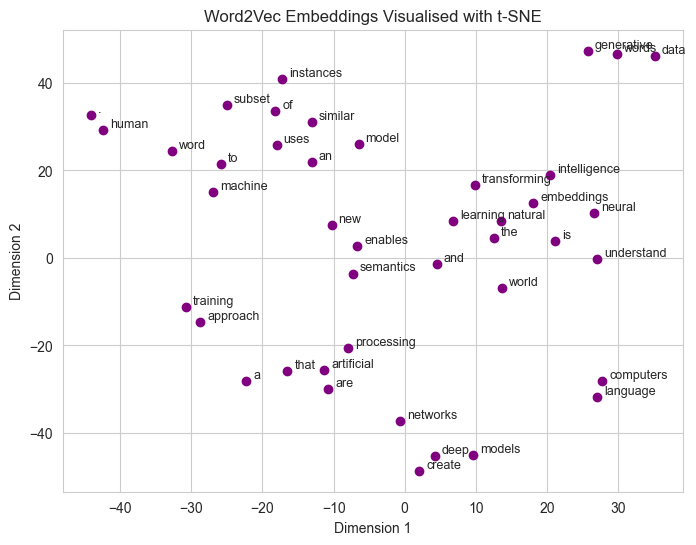

In [28]:
"""
──────────────────────────────
Exercise 2: Visualize the Word Embeddings Using t-SNE
──────────────────────────────
• Extract the word vectors and reduce their dimensionality using t-SNE  
• Create a scatter plot with annotations
"""

# Get the list of words and corresponding vectors
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=3)
word_vectors_2d = tsne.fit_transform(word_vectors)

# Plot the 2D word embeddings
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], color="purple")

# Add annotations for each point
for i, word in enumerate(words):
    plt.annotate(
        word,
        xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]),
        xytext=(5, 2),
        textcoords="offset points",
        fontsize=9,
    )

plt.title("Word2Vec Embeddings Visualised with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

[nltk_data] Downloading package brown to /Users/scsoc/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Vocabulary size from Brown corpus: 376


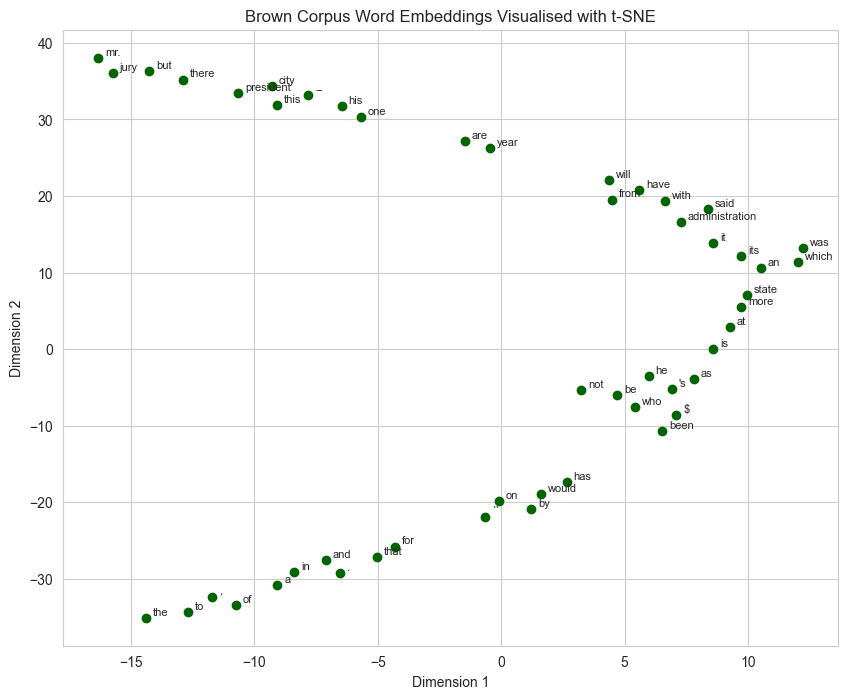

In [29]:
"""
──────────────────────────────
Exercise 3: Experiment with Different Parameters
──────────────────────────────
• Use a larger text corpus (for example, using the NLTK “brown” corpus)  
• Adjust parameters like vector_size, window, and min_count  
• Plot and compare the resulting embeddings

Example code snippet using Brown corpus:
"""

nltk.download("brown")

# Use a subset (or all) of the sentences from the Brown corpus
sentences = brown.sents(categories="news")
# For speed, we take a subset (e.g., first 500 sentences)
subset_sentences = [" ".join(sent) for sent in sentences[:500]]
tokenized_subset = [
    nltk.word_tokenize(sentence.lower()) for sentence in subset_sentences
]

# Train a Word2Vec model on the Brown subset
brown_model = Word2Vec(
    sentences=tokenized_subset,
    vector_size=100,
    window=5,
    min_count=5,
    workers=2,
    seed=42,
)
print("Vocabulary size from Brown corpus:", len(brown_model.wv.index_to_key))

# Visualize the embeddings (selecting a sample of words for clarity)
sample_words = brown_model.wv.index_to_key[:50]  # taking first 50 words
sample_vectors = np.array([brown_model.wv[word] for word in sample_words])

tsne_brown = TSNE(n_components=2, random_state=42, perplexity=5)
sample_vectors_2d = tsne_brown.fit_transform(sample_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(sample_vectors_2d[:, 0], sample_vectors_2d[:, 1], color="darkgreen")
for i, word in enumerate(sample_words):
    plt.annotate(
        word,
        xy=(sample_vectors_2d[i, 0], sample_vectors_2d[i, 1]),
        xytext=(5, 2),
        textcoords="offset points",
        fontsize=8,
    )
plt.title("Brown Corpus Word Embeddings Visualised with t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [30]:
"""
──────────────────────────────
Exercise 4: Explore Similarity and Analogy
──────────────────────────────
• Once you have trained the model, experiment with functions like:
    • model.wv.similarity(word1, word2) – to compute similarity between two words  
    • model.wv.most_similar(positive=[...], negative=[...]) – to find compelling analogies
• Write a cell that computes and prints the similarity between some word pairs and analogies
"""

# Similarity between two words
similarity = model.wv.similarity('machine', 'learning')
print("Similarity between 'machine' and 'learning':", similarity)

# Analogy: 'king' - 'man' + 'woman' (if such words exist in your corpus)
# (If not, pick words from your vocabulary that make sense)
try:
    analogy = model.wv.most_similar(positive=['learning'], negative=['machine'], topn=3)
    print("Analogy result:", analogy)
except KeyError as e:
    print("One of the words was not found in the vocabulary:", e)

Similarity between 'machine' and 'learning': -0.059366424
Analogy result: [('enables', 0.29093679785728455), ('natural', 0.2605031430721283), ('computers', 0.2547418475151062)]
